## Hypothesis: I think that if a student is not a B.A. or B.S. Computer Science major, then their expected course grade in this class is an A.

Since my Jupyter Notebook kernel is running the entire time I am working on functions in data_utils.py, I will use a special extension to automatically reload any changes I make and save in modules I import. The special conventions in the cell below are turning this feature on.

In [5]:
%reload_ext autoreload
%autoreload 2

The constant DATA_DIRECTORY defined below uses the convention of two dots to refer to "one directory up", so it is a str that references the data directory relative to this exercise's directory.

In [6]:
DATA_DIRECTORY="../../data"
DATA_FILE_PATH=f"{DATA_DIRECTORY}/survey.csv"

### First, I will read in the csv and convert it to a column-oriented data table.

In [20]:
from data_utils import read_csv_rows, columnar

data_row: list[dict[str, str]] = read_csv_rows('../../data/survey.csv')
column: dict[str, list[str]] = columnar(data_row)

### Second, I will select just the comp_major and grade columns. Here are the first five rows:

In [14]:
from data_utils import head, select

selected_column_1: dict[str, list[str]] = select(column, ["comp_major"])
selected_column_2: dict[str, list[str]] = select(column, ["grade"])
print(head(selected_column_1, 5))
print(head(selected_column_2, 5))

{'comp_major': ['No', 'No', 'No', 'No', 'Yes - BS']}
{'grade': ['A', 'B', 'B', 'A', 'A']}


### Next, I will count up the totals of students that either responded "Yes - BS" or "Yes - BA" to the comp_major question.

In [55]:
from data_utils import count
counting = count(selected_column_1['comp_major'])

print(f"Non-Computer Science major total is: {counting['No']}")

Non-Computer Science major total is: 331


### This is a mask function in order to produce a list of booleans which will continue to help me to determine if a student has an expected grade of A in COMP 110 if they are a B.A. Computer Science Major.

In [47]:
def majored(column: list[str], point: str) -> list[bool]:
    answer: list[bool] = []
    for thing in column:
        if thing == point:
            answer.append(True)
        else:
            answer.append(False)
    return answer
x = select(column, ["comp_major"])
y = majored(x["comp_major"], "No")
print(y)

[True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, False, False, True, False, True, True, False, False, True, True, True, True, True, True, False, False, False, True, True, False, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, False, True, True, True, False, False, True, True, False, True, False, True, True, True, True, True, True, False, True, False, False, True, False, True, True, False, False, True, False, True, True, False, True, True, True, True, True, True, True, True, True, True, False, False, False, True, True, True, False, True, False, False, False, True, False, True, True, True, True, True, True, False, True, False, True, False, False, True, False, False, False, True, True, True, False, False, True, True, True, True, True, False, False, True, True, True, True, True, False, True, True, True, True, False, True, False, False, 

### This function filters the data obtained from the previous mask function.

In [64]:
def masked(col: list[str], mask: list[bool]) -> list[str]:
    answer: list[str] = []
    for i in range(len(mask)):
        if mask[i]:
            answer.append(col[i])
    return answer
a = select(column, ["grade"])
b = masked(a["grade"], y)
print(f"There are {len(b)} students in this class who are not Computer Science majors.")
print(f"List of Expected Grades for Non-Computer Science Majors: {b}.")

There are 331 students in this class who are not Computer Science majors.
List of Expected Grades for Non-Computer Science Majors: ['A', 'B', 'B', 'A', 'A', 'C', 'B', 'A', 'B', 'A', 'A', 'A', 'A', 'B', 'B', 'D', 'A', 'B', 'B', 'C', 'A', 'A', 'B', 'C', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'A', 'A', 'B', 'C', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'D', 'B', 'C', 'B', 'A', 'A', 'B', 'B', 'A', 'A', 'B', 'B', 'A', 'A', 'B', 'B', 'A', 'A', 'A', 'B', 'A', 'A', 'B', 'A', 'C', 'B', 'A', 'A', 'C', 'A', 'A', 'C', 'B', 'A', 'A', 'A', 'A', 'A', 'A', 'C', 'B', 'A', 'B', 'A', 'A', 'B', 'C', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'A', 'B', 'A', 'B', 'B', 'B', 'B', 'A', 'A', 'B', 'A', 'B', 'B', 'A', 'B', 'B', 'A', 'B', 'C', 'C', 'A', 'A', 'B', 'A', 'A', 'A', 'A', 'A', 'D', 'D', 'B', 'C', 'B', 'B', 'A', 'A', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'C', 'B', 'B', 'B', 'A', 'B', 'C', 'C', 'B', 'A', 'B', 'B', 'B', 'B', 'A', 'C', 'A', 'A', 'A', 'C', 'B', 'A', 'C', 'C'

### I will import the seaborn third-party library to make graphical representations of my data.

In [67]:
import seaborn

### I will now make a BAR CHART to represent how many non-Computer Science majors have each type of expected grade in COMP 110!

<AxesSubplot:>

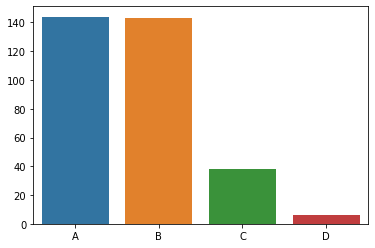

In [68]:
seaborn.barplot(x=["A", "B", "C", "D"], y=[144.0, 143.0, 38.0, 6.0])

## CONCLUSION
In conclusion, my data analysis shows that my hypothesis was correct because there is substantial correlation shown between not being a Computer Science major and having an expected grade of an A in COMP 110. This might be because this isn't a required class for the Computer Science major and is introductory and requires no previous programming experience. As a result, this class may be easier than a Computer Science class that requires previous knowledge. Additionally, some people who take this class may not necessarily be Computer Science majors but may have taken classes in other programming languages that translate well into Python so this class may be easier for them as well. Although the average grade for non-Computer Science majors may be more between A and B, the mode is found in the A column. Overall, there are a lot of variables in the experiences of students in this class that may make this class easier, more accessible, and more enjoyable even for non-Computer Science majors.